#### Description

This code finds optimal number of chromosomes for the GA_2_2 GeneticAlgorithm run method.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import time

from GA_2_2 import GeneticAlgorithm

In [2]:
cnn_model_path = '../Models/CNN_6_1_2.keras'
masked_sequence = 'NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN'
max_length = 150
base_mutation_rate = 0.05

run_per_expression = 10
results = []
target_expressions = [0, 1]
range_num_chromosomes = [1] + [x for x in range(5, len(masked_sequence)+1, 5)]

In [3]:
for target_expression in target_expressions:
    for num_chromosomes in range_num_chromosomes:
        for run_id in range(run_per_expression):
            print(f'target_expression: {target_expression} | num_chromosomes: {num_chromosomes} | Run {run_id + 1} ', end='\r')
            
            ga = GeneticAlgorithm(
                cnn_model_path=cnn_model_path,
                masked_sequence=masked_sequence,
                target_expression=target_expression,
                max_length=max_length,
                pop_size=20,
                generations=100,
                base_mutation_rate=base_mutation_rate,
                precision=0.01,
                chromosomes=num_chromosomes,
                islands=1,
                num_parents=2,
                gene_flow_rate=0.1,
                print_progress=False
            )
            
            # Time the run
            start_time = time.time()
            best_sequence, best_prediction = ga.run()
            end_time = time.time()
            run_time = end_time - start_time
            
            # Record the results
            results.append({
                'target_expression': target_expression,
                'num_chromosomes': num_chromosomes,
                'run_id': run_id + 1,
                'best_sequence': best_sequence,
                'error': abs(best_prediction - target_expression),
                'run_time': run_time
            })
    print()

# Convert results to a DataFrame for analysis
results_df = pd.DataFrame(results)

Instructions for updating:
Use tf.identity with explicit device placement instead.


c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


target_expression: 0 | num_chromosomes: 75 | Run 10 
target_expression: 1 | num_chromosomes: 75 | Run 10 


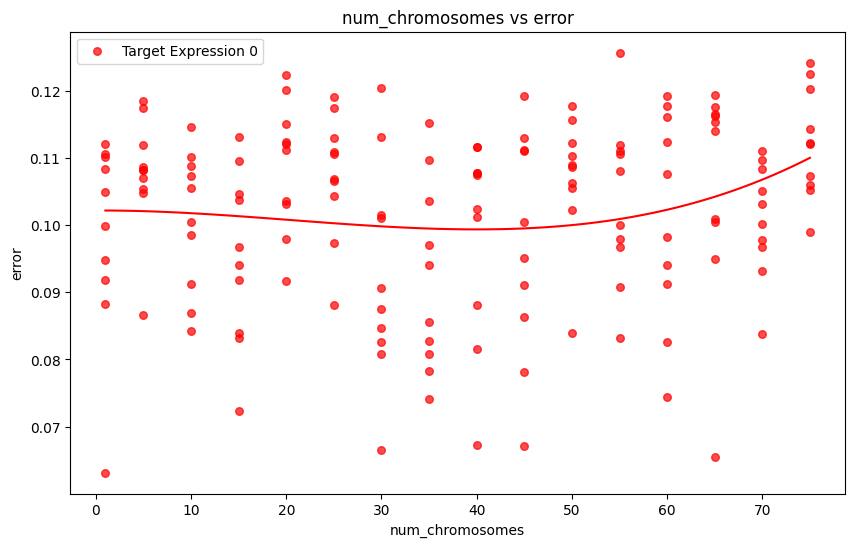

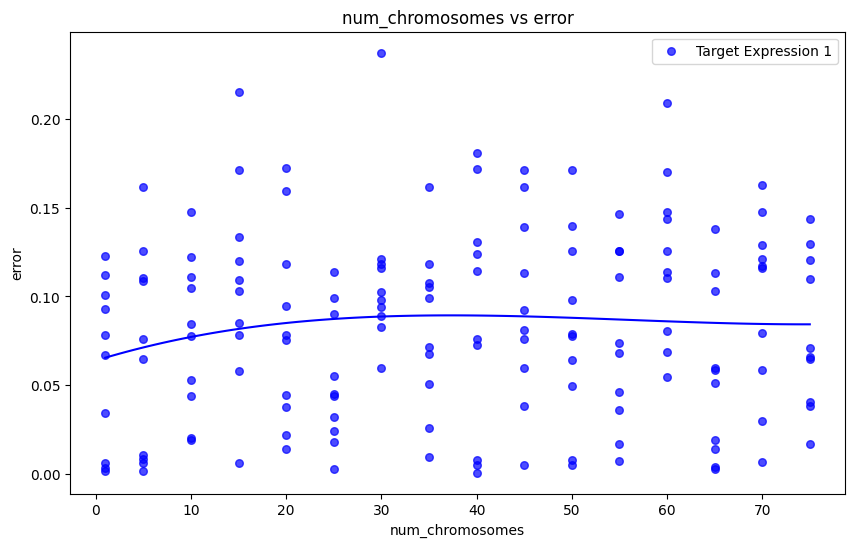

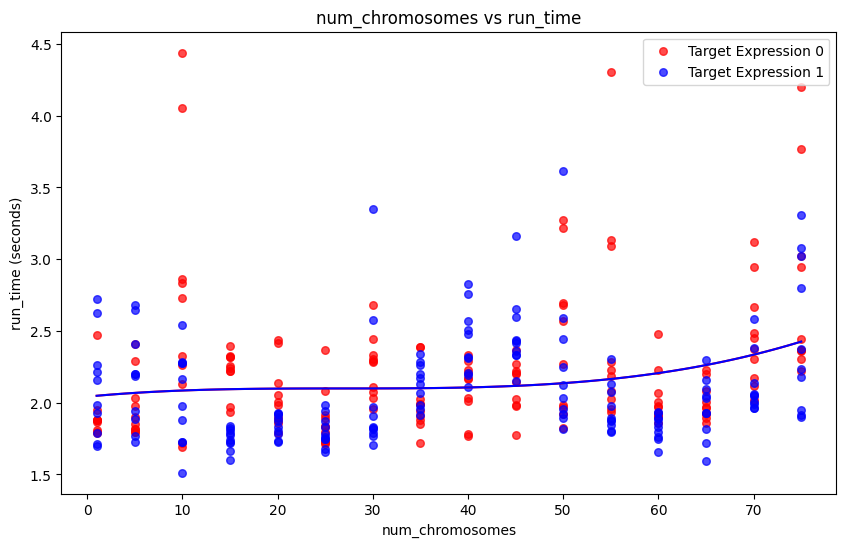

In [8]:
# Scatter plot for num_chromosomes vs error
for target_expression, color in zip([0, 1], ['red', 'blue']):

    subset = results_df[results_df['target_expression'] == target_expression]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(subset['num_chromosomes'], subset['error'], label=f'Target Expression {target_expression}', color=color, s=30, alpha=0.7)
    
    poly_fit = np.polyfit(subset['num_chromosomes'], subset['error'], 3)
    poly_fn = np.poly1d(poly_fit)
    x_vals = np.linspace(subset['num_chromosomes'].min(), subset['num_chromosomes'].max(), 100)
    plt.plot(x_vals, poly_fn(x_vals), color=color)

    plt.title('num_chromosomes vs error')
    plt.xlabel('num_chromosomes')
    plt.ylabel('error')
    plt.legend()
    plt.show()

# Scatter plot for num_chromosomes vs run_time
plt.figure(figsize=(10, 6))
for target_expression, color in zip([0, 1], ['red', 'blue']):
    subset = results_df[results_df['target_expression'] == target_expression]
    plt.scatter(subset['num_chromosomes'], subset['run_time'], label=f'Target Expression {target_expression}', color=color, s=30, alpha=0.7)
    
    poly_fit = np.polyfit(results_df['num_chromosomes'], results_df['run_time'], 3)
    poly_fn = np.poly1d(poly_fit)
    x_vals = np.linspace(results_df['num_chromosomes'].min(), results_df['num_chromosomes'].max(), 100)
    plt.plot(x_vals, poly_fn(x_vals), color=color)
        

plt.title('num_chromosomes vs run_time')
plt.xlabel('num_chromosomes')
plt.ylabel('run_time (seconds)')
plt.legend()
plt.show()
